In [1]:
# Return Forecasting: Time Series Analysis & Modelling with CAD-JPY Exchange rate data

import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# In this notebook, we will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis (cont'd)
# and modeling to determine whether there is any predictable behavior.
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


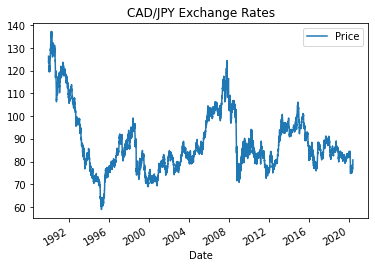

In [4]:
#  Initial Time-Series Plotting
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot(title = 'CAD/JPY Exchange Rates').legend(loc='upper right')

In [5]:
# Question: Do you see any patterns, long-term and/or short?
# Answer: Over the short-term, there is a downward trend from 1991 to late 1995. There's also an upward trend from (cont'd)
# 2000 to 2007. Over the long-term, there is a downward trend from inception to 2020. 

In [6]:
# Decomposition Using a Hodrick-Prescott Filter
# Decompose the exchange rate price into trend and noise

import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
noise, trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

In [7]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
new_df = cad_jpy_df[["Price"]].copy()
new_df["noise"] = noise
new_df["trend"] = trend
new_df.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


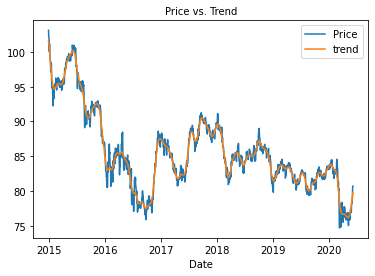

In [8]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
import matplotlib.pyplot as plt
new_df_2015 = new_df.loc['2015':]
plt.plot(new_df_2015['Price'])
plt.plot(new_df_2015['trend'])
plt.xlabel("Date",size=10)
plt.title("Price vs. Trend", size=10)
plt.legend(["Price", "trend"])
plt.show()

In [9]:
# Question: Do you see any patterns, long-term and/or short? 
# Answer: Over the short-term, there is a downward trend from 2015 to late 2016. Over the long-term, (cont'd)
# there is a downward trend from 2015 to mid 2020.

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

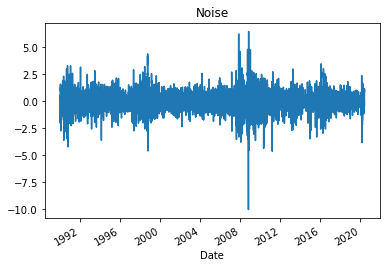

In [10]:
# Plot the Settle Noise
noise.plot(title = 'Noise')

In [11]:
# Forecasting Returns using an ARMA Model

# Using exchange rate Returns, estimate an ARMA model
# 1.ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1)
# 2.Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)
# 3.Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [12]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23010D+00    |proj g|=  3.45590D-04

At iterate    5    f=  1.23010D+00    |proj g|=  3.60378D-05

At iterate   10    f=  1.23010D+00    |proj g|=  3.52207D-04

At iterate   15    f=  1.23008D+00    |proj g|=  2.49623D-03

At iterate   20    f=  1.23007D+00    |proj g|=  9.63229D-05

At iterate   25    f=  1.23007D+00    |proj g|=  1.55431D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   

In [13]:
# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sat, 30 Oct 2021   AIC                          19513.955
Time:                        00:05:05   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8548      0.164     -5.201      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.031      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1699           +0.0000j           42.1699            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Days Returns Forecast'}>

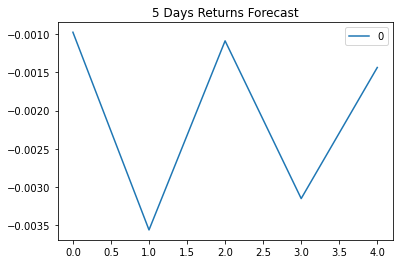

In [14]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Days Returns Forecast")

In [15]:
# Question: Based on the p-value, is the model a good fit?
# Answer: Based on the p-value on the lags, the model is not a good fit since is p>0.05 for ar.L2.y. (cont'd)
# The model is a good fit if p<0.05 for all lags.

In [16]:
# Forecasting the Exchange Rate Price using an ARIMA Model
# Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))

from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
model_ARIMA = ARIMA(cad_jpy_df["Price"], order=(5, 1, 1))

# Fit the model
results_ARIMA = model_ARIMA.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10313D+00    |proj g|=  1.93023D-04

At iterate    5    f=  1.10313D+00    |proj g|=  5.81757D-06


 This problem is unconstrained.



At iterate   10    f=  1.10313D+00    |proj g|=  3.36398D-05

At iterate   15    f=  1.10313D+00    |proj g|=  5.23803D-05

At iterate   20    f=  1.10313D+00    |proj g|=  8.65974D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     25      1     0     0   2.220D-08   1.103D+00
  F =   1.1031309576181170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [17]:
# Output model summary results:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Sat, 30 Oct 2021   AIC                          17507.244
Time:                        00:05:09   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1893           +0.0000j            2.1893            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Days Futures Price Forecast'}>

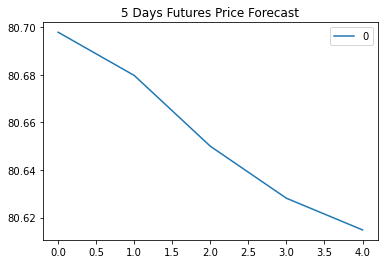

In [18]:
# Plot the 5 Day Price Forecast
pd.DataFrame(results_ARIMA.forecast(steps=5)[0]).plot(title="5 Days Futures Price Forecast")

In [19]:
# Question: What does the model forecast will happen to the Japanese Yen in the near term?
# Answer: The Japanese Yen will strenghten against CAD in the near term.

In [20]:
##  Volatility Forecasting with GARCH

#1.GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
#2.Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)
#3.Plot the 5-day forecast of the volatility.

from arch import arch_model

In [21]:
# Estimate a GARCH model:
model_GARCH = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
results_GARCH = model_GARCH.fit(disp="on")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 306850859.3384427
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838861417698
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11771.663036006626
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.31072801688
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.369930732108
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.112105819691
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027322298947
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.022077988246
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021067661106
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020797453917
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764880363
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.020764882265


In [30]:
# Summarize the model results
results_GARCH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Sat, Oct 30 2021   Df Residuals:                     7928
Time:                        00:05:17   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [31]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [32]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results_GARCH.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [33]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [34]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:title={'center':'5 Day Forecast of Volatility'}>

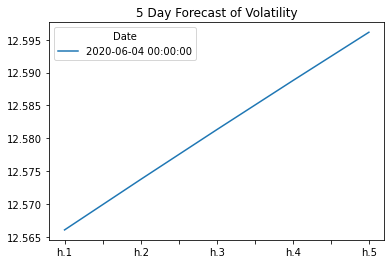

In [35]:
# Plot the final forecast
final.plot(title="5 Day Forecast of Volatility")

In [36]:
# Question: What does the model forecast will happen to volatility in the near term?
# Answer: Volatility will increase in the near term.

In [38]:
# Conclusions
# Based on your time series analysis, would you buy the yen now?
# Yes, if the Yen is expected to increase, I'd buy the Yen.

# Is the risk of the yen expected to increase or decrease?
# It is expected to increase

# Based on the model evaluation, would you feel confident in using these models for trading?
# Yes, I would be confident